# Climate Analysis and Data Exploration



In [45]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [46]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
# create engine to hawaii.sqlite - connect to the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [49]:
"""
Use the SQLAlchemy automap_base() function to reflect your tables into classes.
"""

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

# See which tables are available
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station 

In [29]:
"""
Link Python to the database by creating a SQLAlchemy session.
"""

session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
recent_date = session.query(measurement_table.date).order_by(measurement_table.date.desc()).first()[0]
recent_date

'2017-08-23'

In [31]:
import datetime

<Axes: xlabel='date'>

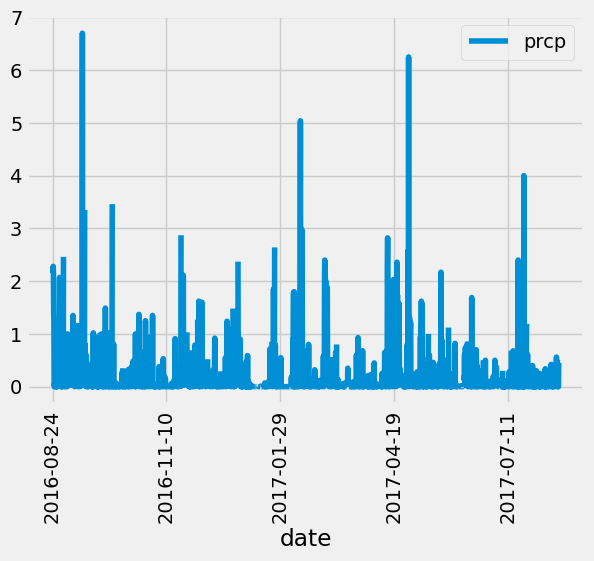

In [32]:
# Calculate the date one year from the last date in data set.
one_year_previous = datetime.datetime.strptime(recent_date, '%Y-%m-%d') - datetime.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_twelve_months_precipitation = session.query(measurement_table.date, measurement_table.prcp).where(measurement_table.date >= one_year_previous).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(last_twelve_months_precipitation)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='prcp', rot=90)

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station_table.station)).all()

[(9,)]

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations_query = session.query(measurement_table.station, func.count(measurement_table.station)).group_by(measurement_table.station).order_by(func.count(measurement_table.station).desc())

most_active_stations = most_active_stations_query.all()

# List the stations and their counts in descending order
print("Most Active Stations:")
for station, count in most_active_stations:
    print(f"Station: {station}, Observations: {count}")

Most Active Stations:
Station: USC00519281, Observations: 2772
Station: USC00519397, Observations: 2724
Station: USC00513117, Observations: 2709
Station: USC00519523, Observations: 2669
Station: USC00516128, Observations: 2612
Station: USC00514830, Observations: 2202
Station: USC00511918, Observations: 1979
Station: USC00517948, Observations: 1372
Station: USC00518838, Observations: 511


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]

# Find the lowest temperature, the highest temperate and the average temperature by only considering rows where the id is the id of the most active station
temperature_stats_query = session.query(func.min(measurement_table.tobs), func.max(measurement_table.tobs), func.avg(measurement_table.tobs)).filter(measurement_table.station == most_active_station_id)

# Retrieve the values
temperature_stats = temperature_stats_query.first()

# Unpacking the values
min_temp, max_temp, avg_temp = temperature_stats

print(f"Lowest Temperature: {min_temp}")
print(f"Highest Temperature: {max_temp}")
print(f"Average Temperature: {avg_temp}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


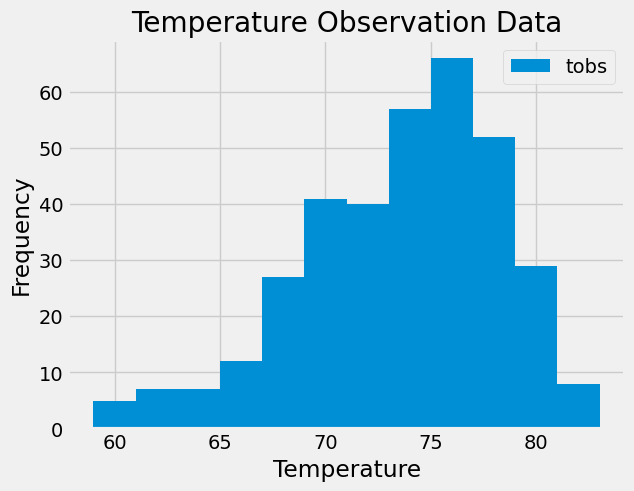

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find all the entries from the most active station in the previous year
tobs_data_query = session.query(measurement_table.tobs).filter(measurement_table.station == most_active_station_id).filter(measurement_table.date >= one_year_previous)

# Use a list comprehension to retrieve the temperatures
tobs_data = [result[0] for result in tobs_data_query.all()]

# Plot the results as a histogram
plt.hist(tobs_data, bins=12, label='tobs')
plt.title("Temperature Observation Data")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close Session

In [38]:
# Close Session
session.close()